# Genre explorer

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import sys
import csv
import ast
import hdf5_getters
from numba import jit
import libfmp
from pywaffle import Waffle
import os
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
sys.path.append("covers")

In /data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /data/s2965003/.conda

In [2]:
def get_readable(track_info,path="covers/"):
    readable=[]
    for i in track_info.iterrows():
        j=i[0]
        i=i[1]
        if Path(path+str(i.msd_id)+".h5").is_file():
            try:
                hf=h5py.File(path+str(i.msd_id)+".h5","r")
                readable.append(j)
                hf.close()
            except:
                continue
        else:
            continue
    #print(readable)
    return readable

In [3]:
first=False
if first:
    g_ind=pd.read_csv("covers/genres_index.csv",names=["id","genre"])
    g_ind

    c_tracks=pd.read_csv("covers/covers_id_train.csv")
    c_tracks

    c_tracks_test=pd.read_csv("covers_test/covers_id_test.csv")
    c_tracks_test

    track_info=c_tracks.merge(g_ind, left_on='msd_id', right_on='id',how="left").drop(columns=["id"])
    track_info=track_info[track_info.index.isin(get_readable(track_info,path="covers/"))]

    track_info_test=c_tracks_test.merge(g_ind, left_on='msd_id', right_on='id',how="left").drop(columns=["id"])
    track_info_test=track_info_test[track_info_test.index.isin(get_readable(track_info_test,path="covers_test/"))]

In [4]:
if first:
    track_info.to_csv("track_info.csv",index=False)
    track_info_test.to_csv("track_info_test.csv",index=False)
track_info=pd.read_csv("track_info.csv")
track_info_test=pd.read_csv("track_info_test.csv")

Total number of cover tracks: 18182
Valid numbers: 6289


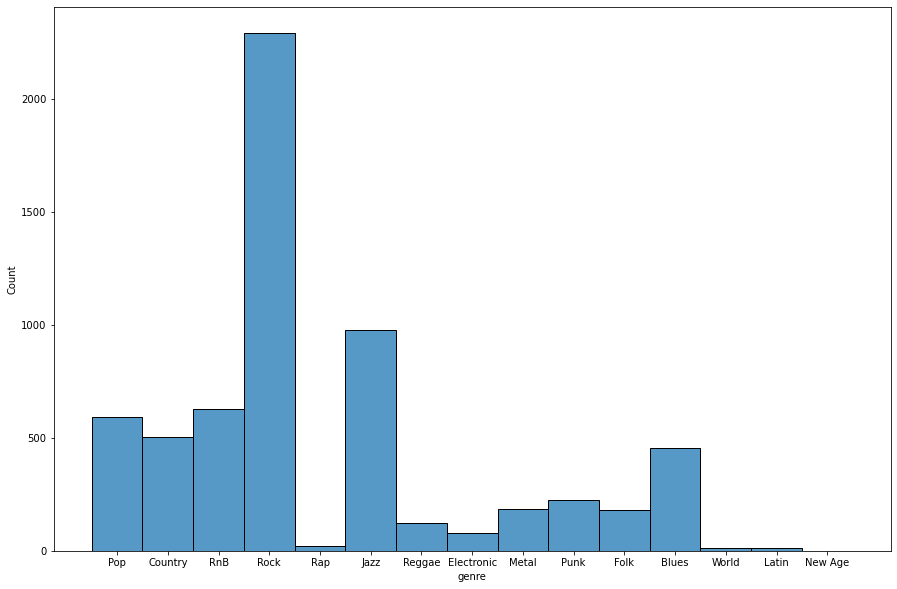

In [5]:
all_tracks_info=track_info.append(track_info_test, ignore_index=True)
print("Total number of cover tracks:",len(all_tracks_info))
all_tracks_info.dropna(inplace=True)
all_tracks_info.reset_index(drop=True,inplace=True)
print("Valid numbers:",len(all_tracks_info))
fig,ax=plt.subplots(figsize=(15,10))
sns.histplot(all_tracks_info, ax=ax, x="genre")
plt.show()

In [6]:
all_tracks_info.groupby('genre').count()["work_id"].values
list(all_tracks_info.groupby('genre').count()["work_id"].keys())

['Blues',
 'Country',
 'Electronic',
 'Folk',
 'Jazz',
 'Latin',
 'Metal',
 'New Age',
 'Pop',
 'Punk',
 'Rap',
 'Reggae',
 'RnB',
 'Rock',
 'World']

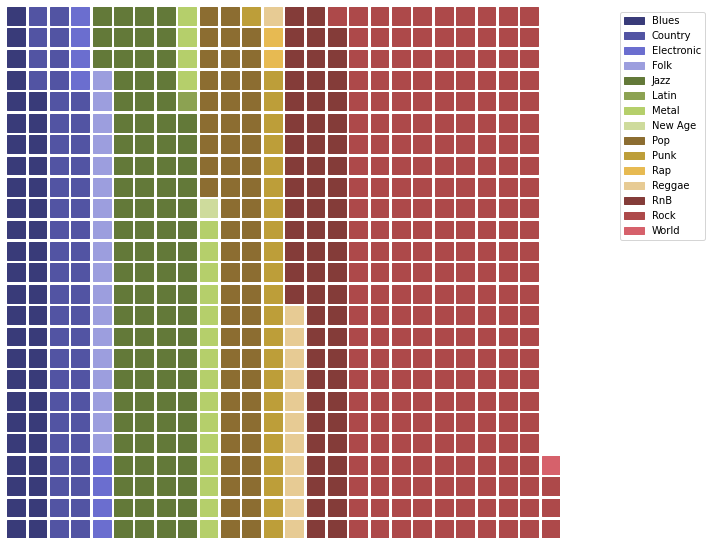

In [7]:
#fig,ax=plt.subplots(figsize=(15,10))
cmap = plt.get_cmap("tab20b")
colors = cmap.colors[:len(all_tracks_info.groupby('genre').count()["work_id"].values)]
fig = plt.figure(
    FigureClass = Waffle,
    rows = 25,
    values = all_tracks_info.groupby('genre').count()["work_id"].values/10,
    labels = list(all_tracks_info.groupby('genre').count()["work_id"].keys()),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)},
    figsize=(10,10),
    colors=colors#[(0, i / 20.0, 0, 1) for i in range(len(all_tracks_info.groupby('genre').count()["work_id"].values))]
)
plt.show()

In [8]:
from IPython.core.display import display, HTML
#data of genre popularity over years from https://thedataface.com/2016/09/culture/genre-lifecycles
display(HTML("<div class='tableauPlaceholder' id='viz1620127325852' style='position: relative'><noscript><a href='https:&#47;&#47;thedataface.com&#47;2016&#47;09&#47;culture&#47;genre-lifecycles'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Al&#47;AllSongsthatHaveEverReachedtheHot100OrganizedbyGenre&#47;AllSongsbyGenre&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='AllSongsthatHaveEverReachedtheHot100OrganizedbyGenre&#47;AllSongsbyGenre' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Al&#47;AllSongsthatHaveEverReachedtheHot100OrganizedbyGenre&#47;AllSongsbyGenre&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1620127325852');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='600px';vizElement.style.maxWidth='1010px';vizElement.style.width='100%';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='600px';vizElement.style.maxWidth='1010px';vizElement.style.width='100%';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='827px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>"))

In [9]:
gtzan_features = pd.read_csv('gtzan_data/features_30_sec.csv')
print(display(gtzan_features.head()))
print(gtzan_features.info())

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean        

In [10]:
print(gtzan_features.columns)

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

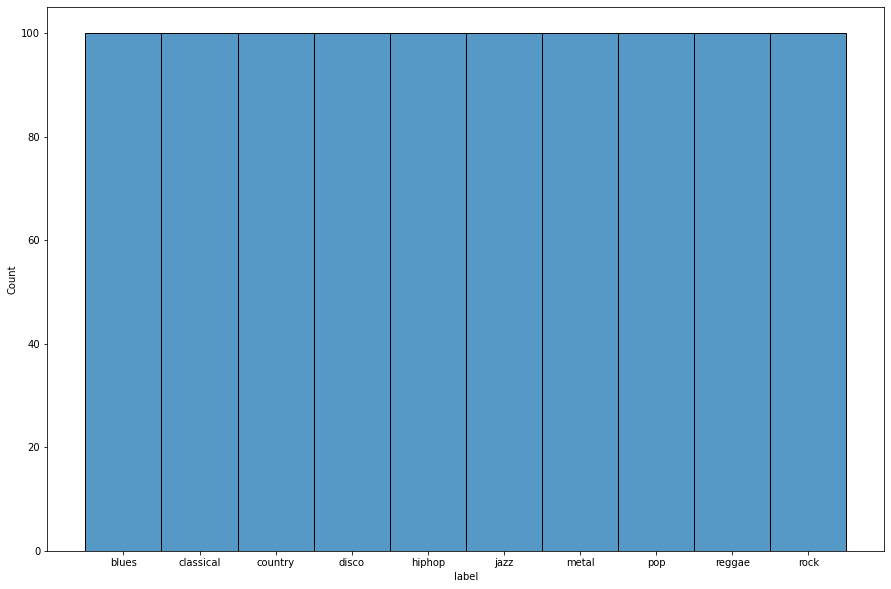

In [11]:
fig,ax=plt.subplots(figsize=(15,10))
sns.histplot(gtzan_features, ax=ax, x="label")
plt.show()

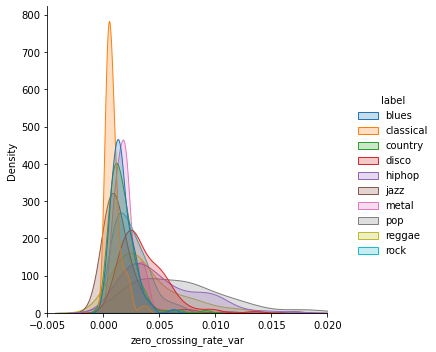

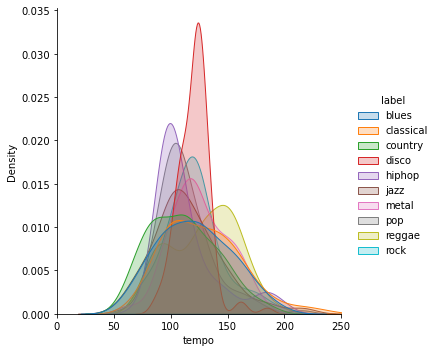

In [12]:
sns.displot(gtzan_features, ax=ax, x="zero_crossing_rate_var",hue="label",kind="kde",fill=True,common_norm=False)
plt.xlim(-0.005, 0.02)
plt.show()
sns.displot(gtzan_features, ax=ax, x="tempo",hue="label",kind="kde",fill=True,common_norm=False)
plt.xlim(0, 250)
plt.show()

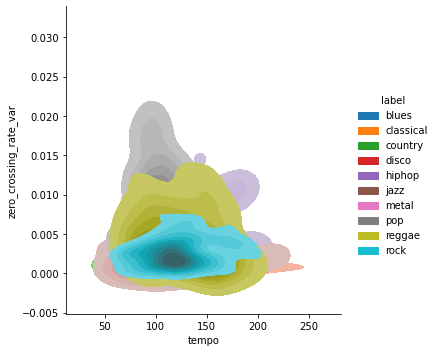

In [13]:
sns.displot(gtzan_features, y="zero_crossing_rate_var", x="tempo",hue="label",kind="kde",fill=True,common_norm=False)
plt.show()

In [14]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

X = gtzan_features.select_dtypes(include=numerics)
print(X.head)

y=gtzan_features.label.astype("category").cat.codes
print(y)

<bound method NDFrame.head of      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0    661794          0.350088         0.088757  0.130228  0.002827   
1    661794          0.340914         0.094980  0.095948  0.002373   
2    661794          0.363637         0.085275  0.175570  0.002746   
3    661794          0.404785         0.093999  0.141093  0.006346   
4    661794          0.308526         0.087841  0.091529  0.002303   
..      ...               ...              ...       ...       ...   
995  661794          0.352063         0.080487  0.079486  0.000345   
996  661794          0.398687         0.075086  0.076458  0.000588   
997  661794          0.432142         0.075268  0.081651  0.000322   
998  661794          0.362485         0.091506  0.083860  0.001211   
999  661794          0.358401         0.085884  0.054454  0.000336   

     spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0               1784.165850          129774.064525

In [92]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from pprint import pprint

depth = []
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.33698695670526657), (4, 0.42398446623798736), (5, 0.47496869327855246), (6, 0.48795570626556545), (7, 0.47791644974743563), (8, 0.5049457584668853), (9, 0.5179609123271095), (10, 0.5099759395534044), (11, 0.521978021978022), (12, 0.5069719013380986), (13, 0.5109397644608912), (14, 0.5119598711148007), (15, 0.4979527514738783), (16, 0.533966033966034), (17, 0.5179679475454123), (18, 0.5149709445484094), (19, 0.5130010834236186)]


              precision    recall  f1-score   support

           0       0.48      0.48      0.48        25
           1       0.69      0.72      0.71        25
           2       0.37      0.56      0.44        25
           3       0.54      0.56      0.55        25
           4       0.50      0.60      0.55        25
           5       0.52      0.52      0.52        25
           6       0.78      0.56      0.65        25
           7       0.70      0.84      0.76        25
           8       0.50      0.28      0.36        25
           9       0.44      0.32      0.37        25

    accuracy                           0.54       250
   macro avg       0.55      0.54      0.54       250
weighted avg       0.55      0.54      0.54       250



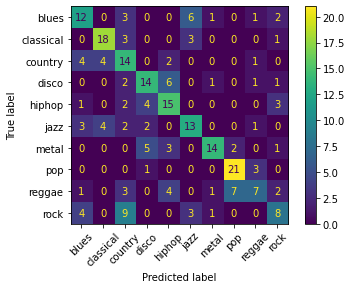

<Figure size 720x432 with 0 Axes>

In [93]:
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0,stratify=y)
clf = tree.DecisionTreeClassifier(max_depth=8)
clf = clf.fit(X_train, y_train)
cm=plot_confusion_matrix(clf, X_test, y_test,display_labels=np.unique(gtzan_features.label))
plt.xticks(rotation=45)
plt.figure(figsize=(10,6))
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

In [94]:
depth = []
for i in range(3,20):
    clf = RandomForestClassifier(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.5070281830845211), (4, 0.5510053326954735), (5, 0.5839723656625065), (6, 0.5979583796485205), (7, 0.6229615454967569), (8, 0.6540149990854216), (9, 0.6400078794444991), (10, 0.6389666671356811), (11, 0.6520240323057225), (12, 0.6640120442937345), (13, 0.6319806953609771), (14, 0.6599878994245191), (15, 0.6650110452927355), (16, 0.6669809064175262), (17, 0.6600019698611248), (18, 0.6590170392987295), (19, 0.6469586751276892)]


              precision    recall  f1-score   support

           0       0.88      0.88      0.88        25
           1       0.91      0.80      0.85        25
           2       0.66      0.84      0.74        25
           3       0.81      0.84      0.82        25
           4       0.83      0.80      0.82        25
           5       0.76      0.76      0.76        25
           6       0.85      0.88      0.86        25
           7       0.85      0.88      0.86        25
           8       0.75      0.72      0.73        25
           9       0.65      0.52      0.58        25

    accuracy                           0.79       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.79      0.79      0.79       250



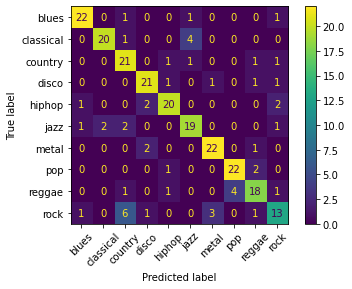

<Figure size 720x432 with 0 Axes>

In [95]:
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0,stratify=y)
clf = RandomForestClassifier(max_depth=10)
clf = clf.fit(X_train, y_train)
cm=plot_confusion_matrix(clf, X_test, y_test,display_labels=np.unique(gtzan_features.label))
plt.xticks(rotation=45)
plt.figure(figsize=(10,6))  
#sns.heatmap(cm, annot=True)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.70      0.76      0.73        25
           2       0.12      0.08      0.10        25
           3       0.18      0.20      0.19        25
           4       0.40      0.16      0.23        25
           5       0.27      0.16      0.20        25
           6       0.32      0.72      0.44        25
           7       0.35      0.24      0.29        25
           8       0.25      0.48      0.33        25
           9       0.19      0.20      0.19        25

    accuracy                           0.30       250
   macro avg       0.28      0.30      0.27       250
weighted avg       0.28      0.30      0.27       250



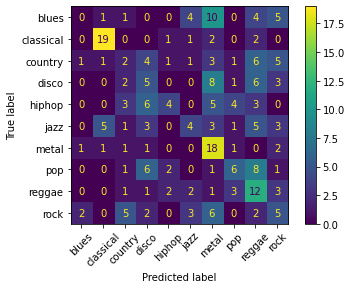

<Figure size 720x432 with 0 Axes>

In [22]:
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0,stratify=y)
clf = NuSVC(decision_function_shape='ovo')
clf = clf.fit(X_train, y_train)
cm=plot_confusion_matrix(clf, X_test, y_test,display_labels=np.unique(gtzan_features.label))
plt.xticks(rotation=45)
plt.figure(figsize=(10,6))  
#sns.heatmap(cm, annot=True)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Genre classification models

### MSD:

In [96]:
c=0
for i in track_info.iterrows():
    i=i[1]
    if Path("covers/"+str(i.msd_id)+".h5").is_file():
        try:
            hf=h5py.File("covers/"+str(i.msd_id)+".h5","r")
            print(hf["musicbrainz"].keys())
            print(hf["analysis"].keys())
            print(hf["metadata"].keys())
            print(hf["analysis"]["songs"]["tempo"])
            #print(list(hf["analysis"]["segments_pitches"]))
            #print(list(hf["analysis"]["segments_start"]))
            #print(list(hf["metadata"]["songs"]))
            break
        except:
            #continue
            break
        c=c
    else:
        c+=1
#print(len(g_ind)-c)

<KeysViewHDF5 ['artist_mbtags', 'artist_mbtags_count', 'songs']>
<KeysViewHDF5 ['bars_confidence', 'bars_start', 'beats_confidence', 'beats_start', 'sections_confidence', 'sections_start', 'segments_confidence', 'segments_loudness_max', 'segments_loudness_max_time', 'segments_loudness_start', 'segments_pitches', 'segments_start', 'segments_timbre', 'songs', 'tatums_confidence', 'tatums_start']>
<KeysViewHDF5 ['artist_terms', 'artist_terms_freq', 'artist_terms_weight', 'similar_artists', 'songs']>
[100.065]


In [97]:
#np.set_printoptions(threshold=np.inf)
#with open('all_tracks_features.csv', 'w') as csv_features:
#csv_features=pd.DataFrame(columns=['bars_confidence', 'bars_start', 'beats_confidence', 'beats_start', 'sections_confidence', 'sections_start', 'segments_confidence', 'segments_loudness_max', 'segments_loudness_max_time', 'segments_loudness_start', 'segments_pitches', 'segments_start', 'segments_timbre'])
if first:
    csvfile=open('all_tracks_info.csv', 'w')
    csvfile.close()
    csvfile=open('all_tracks_info.csv', 'a')
    root="covers/"
    for i in all_tracks_info.iterrows():
        i=i[1]
        f=str(i.msd_id)+".h5"
        try:
            line=hdf5_getters.get_data(root,f)
        except:
            root="covers_test/"
            line=hdf5_getters.get_data(root,f)
        #elements=['bars_confidence', 'bars_start', 'beats_confidence', 'beats_start', 'sections_confidence', 'sections_start', 'segments_confidence', 'segments_loudness_max', 'segments_loudness_max_time', 'segments_loudness_start', 'segments_pitches', 'segments_start', 'segments_timbre']
        #for e in elements:
        #    csv_features[e]=csv_features[e].append(pd.Series(np.array(hf["analysis"][e])),ignore_index=True)
        #print(csv_features)
        csvfile.write(line)
        csvfile.write("\n")
        #break
    csvfile.close()

In [24]:
all_tracks_csv=pd.read_csv("all_tracks_info.csv",index_col=False,sep=",",names=["artist","title","artist_loc","release","hotttness","familiarity","danceability","duration","energy","loudness","year","tempo","analysis_rate","end_of_fade_in","key","key_confidence","mode","mode_confidence","start_of_fade_out","time_signature","time_signature_conf","track_id"])
all_tracks_csv#["tempo"]=all_tracks_csv["tempo"].astype(float)
#all_tracks_csv["tempo"][all_tracks_csv["tempo"]>1000]=all_tracks_csv["tempo"][all_tracks_csv["tempo"]>1000]/-20

,artist,title,artist_loc,release,hotttness,familiarity,danceability,duration,energy,loudness,...,analysis_rate,end_of_fade_in,key,key_confidence,mode,mode_confidence,start_of_fade_out,time_signature,time_signature_conf,track_id
0,THE CHIFFONS,He's So Fine,New York NY [The Bronx],Girls of the 60's,0.398350,0.599537,0.0,113.18812,0.0,-11.565,...,22050,0.496,7,0.915,1,0.735,103.056,4,0.646,TRFYRVZ128F92EF998
1,Jody Miller,He's So Fine,Phoenix AZ,Country's Greatest Hits of the 70's,0.306133,0.439970,0.0,174.49751,0.0,-11.168,...,22050,0.000,2,0.309,1,0.592,167.747,3,0.427,TRGSXCN128F9320D4B
2,Diana Ross,These Things Will Keep Me Loving You,Detroit MI,All The Great Love Songs,0.544792,0.735615,0.0,188.68200,0.0,-11.530,...,22050,2.084,0,0.622,1,0.570,181.626,4,0.055,TRKQBVB128C7196AED
3,Kim Weston,Take Me In Your Arms (Rock Me A Little While),Detroit MI,Divas of Motown,0.363455,0.545017,0.0,170.37016,0.0,-6.661,...,22050,0.293,5,0.653,0,0.464,163.683,4,0.097,TRBKHJE128F931F762
4,The Isley Brothers,Take Me In Your Arms (Rock Me A Little While),Cincinnati Ohio,Greatest Motown Hits,0.571771,0.750583,0.0,158.79791,0.0,-15.121,...,22050,0.262,5,0.892,1,0.778,148.550,4,0.074,TRNOHZD128C719668F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6284,The Supremes,Where Did Our Love Go,Columbus OH,Where Did Our Love Go: 40th Anniversary Edition,0.514958,0.681189,0.0,213.62893,0.0,-5.813,...,22050,0.000,0,0.653,1,0.319,206.327,4,0.262,TRUXBQR128EF349A44
6285,MNEMIC,Wild boys,Aalborg Denmark,The Audio Injected Soul,0.451830,0.691055,0.0,301.58322,0.0,-5.338,...,22050,0.000,4,0.418,0,0.403,290.998,4,0.266,TRXFNRU128F424C3D3
6286,Gary Hoey,Wipeout,NaN,The Best Of Gary Hoey,0.460101,0.589117,0.0,211.59138,0.0,-5.078,...,22050,0.096,6,0.777,1,0.724,195.535,4,0.427,TRUBFGZ128F933FF05
6287,Devo,Working In A Coal Mine,Georgia,Hot Potatoes: The Best Of Devo,0.522267,0.707840,0.0,169.97832,0.0,-14.312,...,22050,0.148,0,1.000,1,0.724,159.312,4,0.947,TRPEAEG128F1458AAB


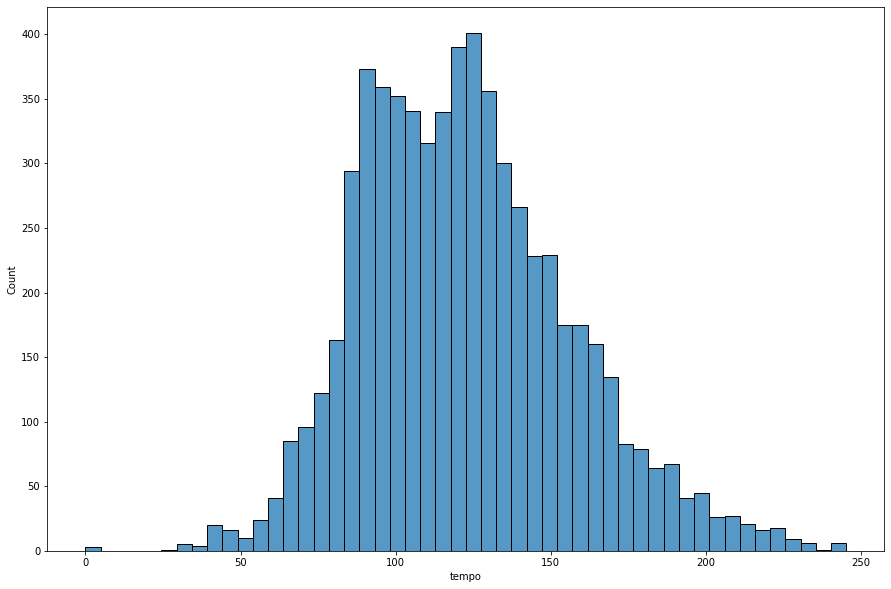

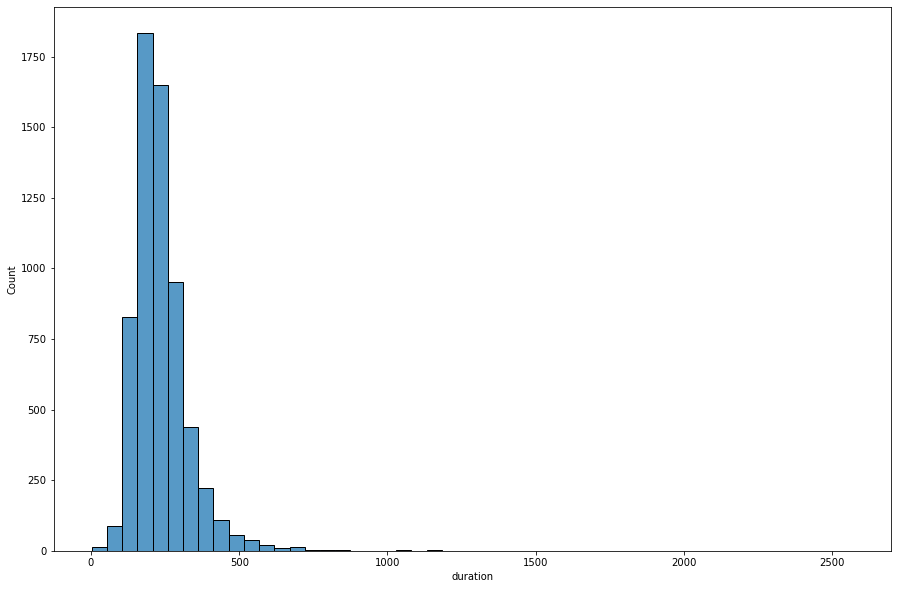

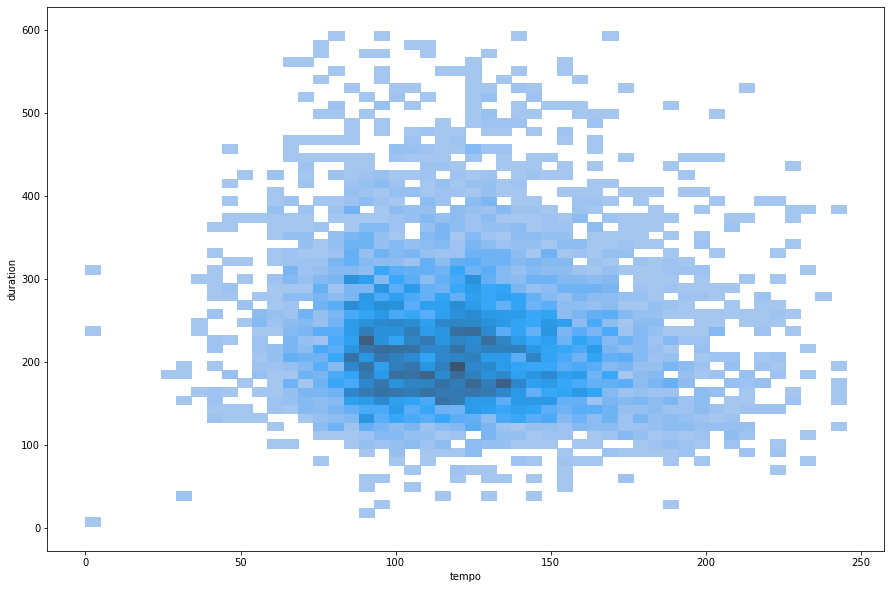

In [25]:
fig,ax=plt.subplots(figsize=(15,10))
sns.histplot(all_tracks_csv, ax=ax, x="tempo",bins=50)
plt.show()
fig,ax=plt.subplots(figsize=(15,10))
sns.histplot(all_tracks_csv, ax=ax, x="duration",bins=50)
plt.show()
fig,ax=plt.subplots(figsize=(15,10))
sns.histplot(all_tracks_csv[all_tracks_csv["duration"]<600], ax=ax, x="tempo",y="duration")
plt.show()

In [26]:
#first=True
if first:
    csvfile=open('all_tracks_features.csv', 'w')
    csvfile.close()
    elements=['track_id','bars_confidence', 'bars_start', 'beats_confidence', 'beats_start', 'sections_confidence', 'sections_start', 'segments_confidence', 'segments_loudness_max', 'segments_loudness_max_time', 'segments_loudness_start', 'segments_pitches', 'segments_start', 'segments_timbre']
    csv_features=pd.DataFrame(columns=elements)
    all_tracks_merg=all_tracks_csv.merge(all_tracks_info,left_on="track_id",right_on="msd_id")
    csv_features=csv_features.merge(all_tracks_merg,how="right")
    for e in elements:
        csv_features[e]=csv_features[e].astype(object)
    root="covers/"
    for i in csv_features.iterrows():
        j=i[0]
        i=i[1]
        print(j)
        f=str(i.msd_id)+".h5"
        try:
            #line=hdf5_getters.get_data(root,f)
            hf=h5py.File(root+f,"r")
        except:
            root="covers_test/"
            #line=hdf5_getters.get_data(root,f)
            hf=h5py.File(root+f,"r")
        elements=['bars_confidence', 'bars_start', 'beats_confidence', 'beats_start', 'sections_confidence', 'sections_start', 'segments_confidence', 'segments_loudness_max', 'segments_loudness_max_time', 'segments_loudness_start', 'segments_pitches', 'segments_start', 'segments_timbre']
        for e in elements:
            csv_features[e].iloc[j]=list(hf["analysis"][e]).copy()
        #break
    csv_features.to_csv("all_tracks_features.csv")

In [27]:
csv_features=pd.read_csv("all_tracks_features.csv")
print(csv_features.head)

<bound method NDFrame.head of       Unnamed: 0                                    bars_confidence  \
0              0  [0.018, 0.017, 0.619, 0.02, 0.19, 0.084, 0.087...   
1              1  [0.138, 0.116, 0.256, 0.244, 0.112, 0.086, 0.0...   
2              2  [0.109, 0.173, 0.003, 0.052, 0.082, 0.041, 0.0...   
3              3  [0.116, 0.015, 0.04, 0.033, 0.02, 0.051, 0.266...   
4              4  [0.127, 0.397, 0.039, 0.088, 0.002, 0.016, 0.0...   
...          ...                                                ...   
6284        6284  [0.427, 0.033, 0.052, 0.054, 0.017, 0.219, 0.1...   
6285        6285  [0.029, 0.036, 0.015, 0.056, 0.218, 0.022, 0.0...   
6286        6286  [0.075, 0.093, 0.286, 0.127, 0.181, 0.336, 0.0...   
6287        6287  [0.1, 0.005, 0.148, 0.03, 0.217, 0.92, 0.279, ...   
6288        6288  [0.017, 0.018, 0.006, 0.025, 0.026, 0.043, 0.0...   

                                             bars_start  \
0     [0.80481, 2.50764, 4.19952, 5.88764, 7.57595, ...   

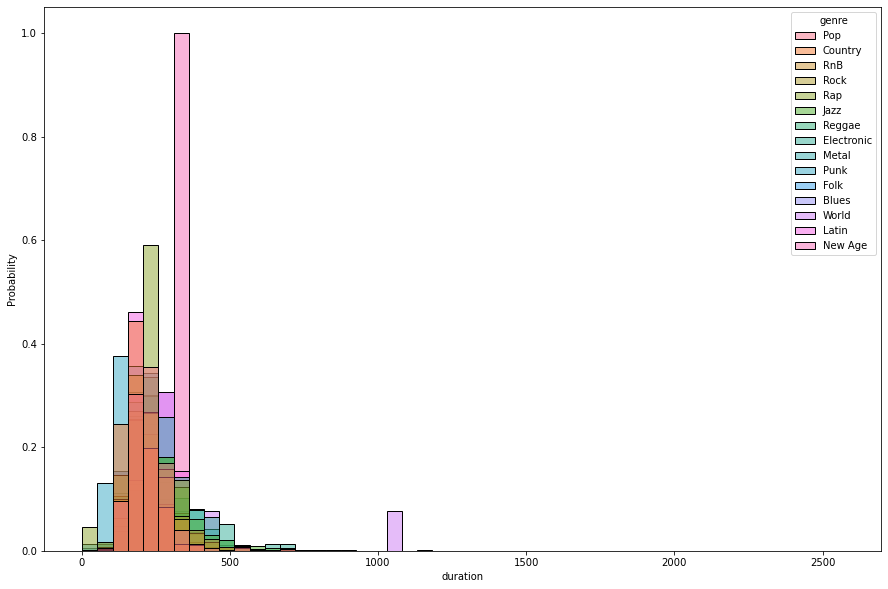

In [28]:
fig,ax=plt.subplots(figsize=(15,10))
sns.histplot(csv_features, ax=ax, x="duration",bins=50,hue="genre",stat="probability",common_norm=False)
plt.show()

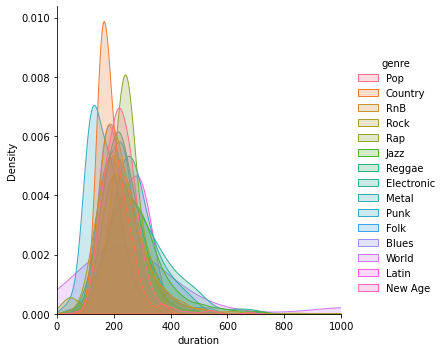

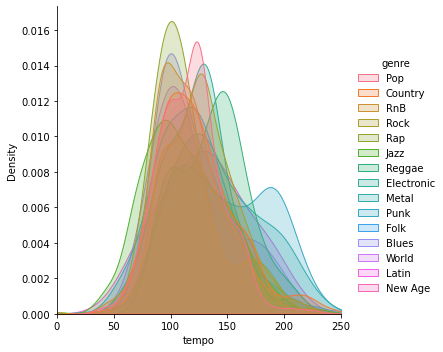

In [29]:
#fig,ax=plt.subplots(figsize=(15,10))
sns.displot(csv_features, ax=ax, x="duration",hue="genre",kind="kde",fill=True,common_norm=False)
plt.xlim(0, 1000)
plt.show()
sns.displot(csv_features, ax=ax, x="tempo",hue="genre",kind="kde",fill=True,common_norm=False)
plt.xlim(0, 250)
plt.show()

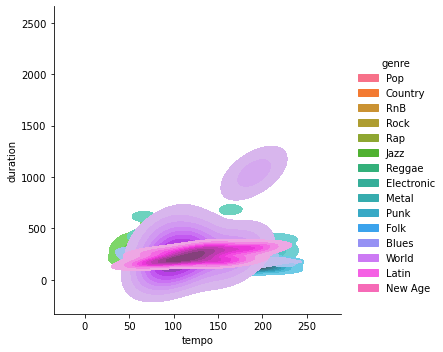

In [30]:
sns.displot(csv_features, y="duration", x="tempo",hue="genre",kind="kde",fill=True,common_norm=False)
plt.show()

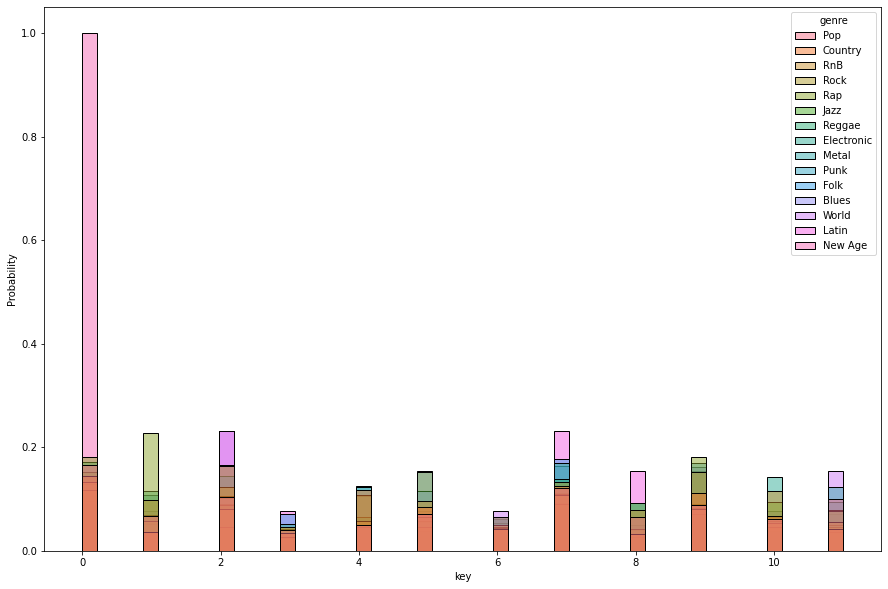

In [31]:
fig,ax=plt.subplots(figsize=(15,10))
sns.histplot(csv_features, ax=ax, x="key",bins=50,hue="genre",stat="probability",common_norm=False)
plt.show()

## Classical approach - Decision tree:

In [32]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

X = csv_features[~csv_features.genre.isin(["World","Latin","Rap","New Age"])].select_dtypes(include=numerics).drop(labels=["energy","clique_size","shs_id","Unnamed: 0"], axis=1)
print(X.head)

y=csv_features[~csv_features.genre.isin(["World","Latin","Rap","New Age"])].genre.astype("category").cat.codes
print(y)

<bound method NDFrame.head of       hotttness  familiarity  danceability   duration  loudness  year  \
0      0.398350     0.599537           0.0  113.18812   -11.565  1984   
1      0.306133     0.439970           0.0  174.49751   -11.168     0   
2      0.544792     0.735615           0.0  188.68200   -11.530  1970   
3      0.363455     0.545017           0.0  170.37016    -6.661  1965   
4      0.571771     0.750583           0.0  158.79791   -15.121  1986   
...         ...          ...           ...        ...       ...   ...   
6284   0.514958     0.681189           0.0  213.62893    -5.813  1964   
6285   0.451830     0.691055           0.0  301.58322    -5.338  2004   
6286   0.460101     0.589117           0.0  211.59138    -5.078     0   
6287   0.522267     0.707840           0.0  169.97832   -14.312  1989   
6288   0.457626     0.679839           0.0  233.63873    -6.871  1974   

        tempo  analysis_rate  end_of_fade_in  key  key_confidence  mode  \
0     144.391     

In [33]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6240 entries, 0 to 6288
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hotttness            6240 non-null   float64
 1   familiarity          6240 non-null   float64
 2   danceability         6240 non-null   float64
 3   duration             6240 non-null   float64
 4   loudness             6240 non-null   float64
 5   year                 6240 non-null   int64  
 6   tempo                6240 non-null   float64
 7   analysis_rate        6240 non-null   int64  
 8   end_of_fade_in       6240 non-null   float64
 9   key                  6240 non-null   int64  
 10  key_confidence       6240 non-null   float64
 11  mode                 6240 non-null   int64  
 12  mode_confidence      6240 non-null   float64
 13  start_of_fade_out    6240 non-null   float64
 14  time_signature       6240 non-null   int64  
 15  time_signature_conf  6240 non-null   f

In [107]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import cross_val_score
from pprint import pprint

depth = []
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.41442289648567676), (4, 0.42724310512053415), (5, 0.43044851677138674), (6, 0.43621746686021723), (7, 0.44006223527897675), (8, 0.44310317927657245), (9, 0.43429112823731664), (10, 0.427721948648705), (11, 0.41810589344221627), (12, 0.40849019772786593), (13, 0.4015999916597824), (14, 0.39374976183645843), (15, 0.38365324538717666), (16, 0.37628006163133215), (17, 0.372752724770662), (18, 0.3753182404154004), (19, 0.3658607212418872)]


              precision    recall  f1-score   support

           0       0.27      0.19      0.22       114
           1       0.43      0.22      0.29       126
           2       1.00      0.05      0.10        19
           3       0.14      0.02      0.04        45
           4       0.46      0.48      0.47       244
           5       0.38      0.06      0.11        47
           6       0.20      0.12      0.15       148
           7       0.48      0.25      0.33        56
           8       0.00      0.00      0.00        31
           9       0.29      0.18      0.22       157
          10       0.48      0.78      0.59       573

    accuracy                           0.43      1560
   macro avg       0.38      0.21      0.23      1560
weighted avg       0.40      0.43      0.39      1560



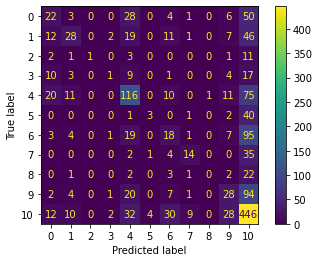

In [108]:
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0,stratify=y)
clf = tree.DecisionTreeClassifier(max_depth=8)
clf = clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

In [109]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import cross_val_score
from pprint import pprint

depth = []
for i in range(3,20):
    clf = RandomForestClassifier(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.42099117734394265), (4, 0.4299666175600406), (5, 0.43861995282025174), (6, 0.44550818168157486), (7, 0.45127695202433626), (8, 0.4615347006976305), (9, 0.46890554775457616), (10, 0.4746741383512684), (11, 0.4826877573514345), (12, 0.4858920905258723), (13, 0.49326311732888717), (14, 0.4937451962863025), (15, 0.49679009469741914), (16, 0.4967911731738338), (17, 0.4963123296456629), (18, 0.49903638132337685), (19, 0.49694988895287856)]


              precision    recall  f1-score   support

           0       0.42      0.20      0.27       114
           1       0.40      0.19      0.26       126
           2       0.00      0.00      0.00        19
           3       0.25      0.02      0.04        45
           4       0.50      0.65      0.56       244
           5       0.33      0.02      0.04        47
           6       0.46      0.09      0.15       148
           7       0.65      0.23      0.34        56
           8       1.00      0.06      0.12        31
           9       0.57      0.13      0.22       157
          10       0.48      0.86      0.61       573

    accuracy                           0.48      1560
   macro avg       0.46      0.22      0.24      1560
weighted avg       0.48      0.48      0.41      1560



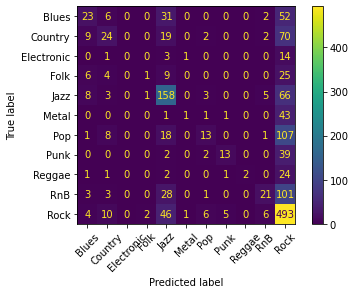

<Figure size 720x504 with 0 Axes>

In [113]:
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0,stratify=y)
clf = RandomForestClassifier(max_depth=19)
clf = clf.fit(X_train, y_train)
cm=plot_confusion_matrix(clf, X_test, y_test,display_labels=np.unique(csv_features[~csv_features.genre.isin(["World","Latin","Rap","New Age"])].genre))
plt.xticks(rotation=45)
plt.figure(figsize=(10,7))  
#sns.heatmap(cm, annot=True)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       114
           1       0.00      0.00      0.00       126
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00        45
           4       0.00      0.00      0.00       244
           5       0.00      0.00      0.00        47
           6       0.00      0.00      0.00       148
           7       0.00      0.00      0.00        56
           8       0.00      0.00      0.00        31
           9       0.00      0.00      0.00       157
          10       0.37      1.00      0.54       573

    accuracy                           0.37      1560
   macro avg       0.03      0.09      0.05      1560
weighted avg       0.13      0.37      0.20      1560



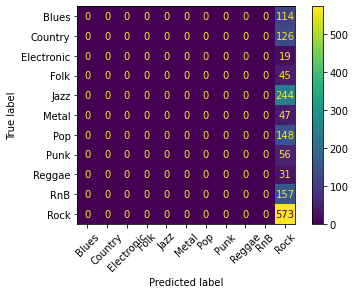

<Figure size 720x504 with 0 Axes>

In [37]:
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0,stratify=y)
clf = SVC()
clf = clf.fit(X_train, y_train)
cm=plot_confusion_matrix(clf, X_test, y_test,display_labels=np.unique(csv_features[~csv_features.genre.isin(["World","Latin","Rap","New Age"])].genre))
plt.xticks(rotation=45)
plt.figure(figsize=(10,7))  
#sns.heatmap(cm, annot=True)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

## Deep learning appraoch - CCN for pitch and timbre:

In [124]:
def get_array(arr,s=256):
    return np.pad(np.array(ast.literal_eval(arr.replace("\n","").replace(" ","").replace("array(","").replace(")",""))),(min(s,max(0,s-len(ast.literal_eval(arr.replace("\n","").replace(" ","").replace("array(","").replace(")",""))))),0)).T[:,:s]

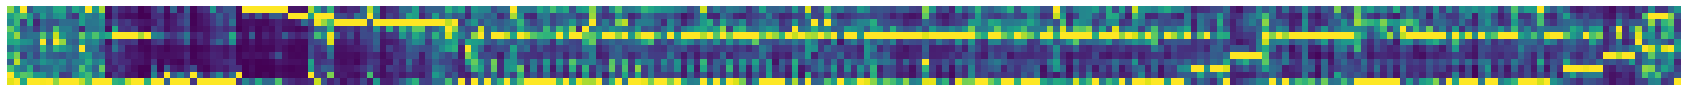

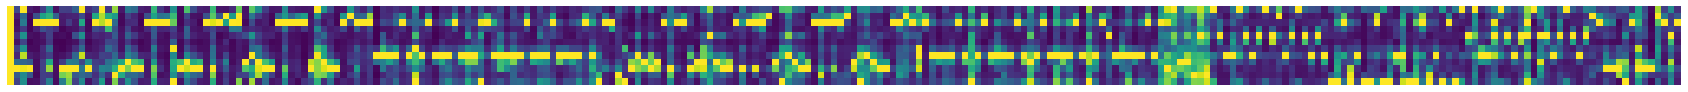

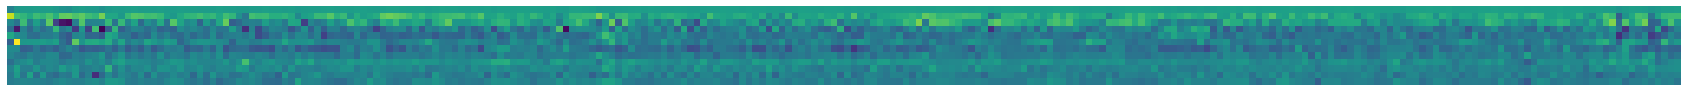

In [125]:
segments_pitches=get_array(csv_features.segments_pitches.iloc[100])
fig,ax=plt.subplots(figsize=(30,10))
plt.imshow(segments_pitches)
plt.axis('off')
plt.show()

segments_pitches=get_array(csv_features.segments_pitches.iloc[0])
fig,ax=plt.subplots(figsize=(30,10))
plt.imshow(segments_pitches)
plt.axis('off')
plt.show()

segments_timbre=get_array(csv_features.segments_timbre.iloc[0])
fig,ax=plt.subplots(figsize=(30,10))
plt.imshow(segments_timbre)
plt.axis('off')
plt.show()

In [168]:
if first:
    folder="genre_images_pitch/"
    for j in range(len(csv_features)):
        segments_pitches=get_array(csv_features.segments_pitches.iloc[j])
        fig,ax=plt.subplots(figsize=(30,10))
        plt.imshow(segments_pitches)
        plt.axis('off')
        genre=csv_features.genre.iloc[j]
        if not os.path.exists(folder+"data/train/"+genre):
            os.makedirs(folder+"data/train/"+genre)
        plt.savefig(folder+"data/train/"+genre+"/"+genre+"_"+str(j)+".png")
        #plt.savefig(folder+str(j)+".png")
        plt.close(fig)
        #plt.show()

In [167]:
if first:
    folder="genre_images_timbre/"
    for j in range(len(csv_features)):
        segments_pitches=get_array(csv_features.segments_timbre.iloc[j])
        fig,ax=plt.subplots(figsize=(30,10))
        plt.imshow(segments_pitches)
        plt.axis('off')
        genre=csv_features.genre.iloc[j]
        if not os.path.exists(folder+"data/train/"+genre):
            os.makedirs(folder+"data/train/"+genre)
        plt.savefig(folder+"data/train/"+genre+"/"+genre+"_"+str(j)+".png")
        #plt.savefig(folder+str(j)+".png")
        plt.close(fig)
        #break
        #plt.show()

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


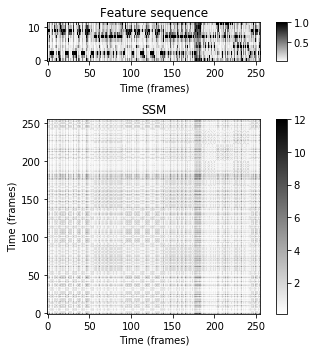

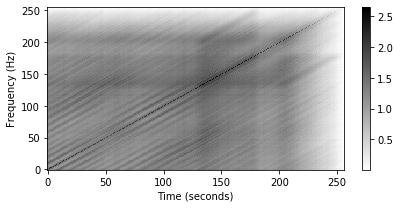

In [126]:
import libfmp.c3
@jit(nopython=True)
def compute_sm_dot(X, Y):
    S = np.dot(np.transpose(X), Y)
    return S

@jit(nopython=True)
def filter_diag_sm(S, L):
    """Path smoothing of similarity matrix by forward filtering along main diagonal

    Notebook: C4/C4S2_SSM-PathEnhancement.ipynb

    Args:
        S (np.ndarray): Similarity matrix (SM)
        L (int): Length of filter

    Returns:
        S_L (np.ndarray): Smoothed SM
    """
    N = S.shape[0]
    M = S.shape[1]
    S_L = np.zeros((N, M))
    S_extend_L = np.zeros((N + L, M + L))
    S_extend_L[0:N, 0:M] = S
    for pos in range(0, L):
        S_L = S_L + S_extend_L[pos:(N + pos), pos:(M + pos)]
    S_L = S_L / L
    return S_L

@jit(nopython=True)
def filter_diag_mult_sm(S, L=1, tempo_rel_set=np.asarray([1]), direction=0):
    """Path smoothing of similarity matrix by filtering in forward or backward direction
    along various directions around main diagonal.
    Note: Directions are simulated by resampling one axis using relative tempo values

    Notebook: C4/C4S2_SSM-PathEnhancement.ipynb

    Args:
        S (np.ndarray): Self-similarity matrix (SSM)
        L (int): Length of filter (Default value = 1)
        tempo_rel_set (np.ndarray): Set of relative tempo values (Default value = np.asarray([1]))
        direction (int): Direction of smoothing (0: forward; 1: backward) (Default value = 0)

    Returns:
        S_L_final (np.ndarray): Smoothed SM
    """
    N = S.shape[0]
    M = S.shape[1]
    num = len(tempo_rel_set)
    S_L_final = np.zeros((N, M))

    for s in range(0, num):
        M_ceil = int(np.ceil(M / tempo_rel_set[s]))
        resample = np.multiply(np.divide(np.arange(1, M_ceil+1), M_ceil), M)
        np.around(resample, 0, resample)
        resample = resample - 1
        index_resample = np.maximum(resample, np.zeros(len(resample))).astype(np.int64)
        S_resample = S[:, index_resample]

        S_L = np.zeros((N, M_ceil))
        S_extend_L = np.zeros((N + L, M_ceil + L))

        # Forward direction
        if direction == 0:
            S_extend_L[0:N, 0:M_ceil] = S_resample
            for pos in range(0, L):
                S_L = S_L + S_extend_L[pos:(N + pos), pos:(M_ceil + pos)]

        # Backward direction
        if direction == 1:
            S_extend_L[L:(N+L), L:(M_ceil+L)] = S_resample
            for pos in range(0, L):
                S_L = S_L + S_extend_L[(L-pos):(N + L - pos), (L-pos):(M_ceil + L - pos)]

        S_L = S_L / L
        resample = np.multiply(np.divide(np.arange(1, M+1), M), M_ceil)
        np.around(resample, 0, resample)
        resample = resample - 1
        index_resample = np.maximum(resample, np.zeros(len(resample))).astype(np.int64)

        S_resample_inv = S_L[:, index_resample]
        S_L_final = np.maximum(S_L_final, S_resample_inv)

    return S_L_final

def vis_ssm(S,x):
    # Visualization
    cmap = 'gray_r'
    fig, ax = plt.subplots(2, 2, gridspec_kw={'width_ratios': [1, 0.05], 
                                              'height_ratios': [0.2, 1]}, figsize=(4.5, 5))
    libfmp.b.plot_matrix(x, Fs=1, ax=[ax[0,0], ax[0,1]], cmap=cmap,
                xlabel='Time (frames)', ylabel='', title='Feature sequence')
    libfmp.b.plot_matrix(S, Fs=1, ax=[ax[1,0], ax[1,1]], cmap=cmap,
                title='SSM', xlabel='Time (frames)', ylabel='Time (frames)', colorbar=True);
    plt.tight_layout()
    plt.show()
    #fig, ax = plt.subplots(figsize=(5, 5))
    libfmp.b.plot_matrix(filter_diag_mult_sm(S,50),cmap=cmap)
    plt.show()
    return

# Compute SSM
S = compute_sm_dot(segments_pitches,segments_pitches)
vis_ssm(S,segments_pitches)

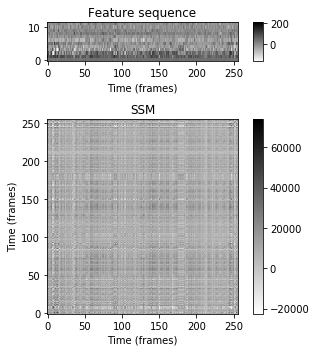

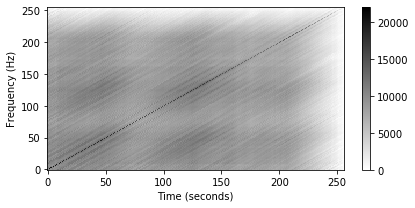

In [129]:
S = compute_sm_dot(segments_timbre,segments_timbre)
vis_ssm(S,segments_timbre)